# **CS3390 Foundations of Machine Learning**
**Assignment 1**

# **Q1.**
**Problem Statement:**

* Gather data on meal consumption times in a mess, considering features like day, time, holidays, and meal categories (breakfast, lunch, etc.) over the next two weeks.
* Conduct exploratory data analysis and create plots depicting meal times across different days for each meal category.
* Propose a suitable modeling approach, leveraging Maximum Likelihood estimation with 80% of the data to learn model parameters, and implement the model in Python.
* Evaluate the learned model's performance on 20% of the collected data using an appropriate evaluation metric and compare it to a linear regression model, with code and a readme file for reference.


In [2]:
# Required Imports
import csv
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
import math

In [3]:
# Loading and printing the data
test_data = pd.read_csv('/content/test_data_new.csv')
print(test_data.head(5))

         Date  Day   Time  Holiday  Category  Time Taken
0  22-09-2023    5   9.15        0         1       24.67
1  22-09-2023    5  13.15        0         2       40.32
2  22-09-2023    5  20.30        0         3       64.12
3  23-09-2023    6   9.10        1         1       34.23
4  23-09-2023    6  13.05        1         2       45.97


**Convention:**

* **Day:** Monday - 1, Tuesday - 2, Wednesday - 3…
* **Holiday:** Is a holiday - 1, Is not a holiday - 0 (Saturdays and Sundays are not considered holidays, only Eid and Gandhi Jayanti in this data set are considered holidays)
* **Category:** Breakfast - 1, Lunch - 2, Dinner - 3
* **Time and Time Taken:** 20.5 ←→ 8:30 PM, 9.1 ←→ 9:06 AM, and so on

In [4]:
# Statistics
# Category Wise
mean_breakfast = st.mean([test_data['Time Taken'][i] for i in range (42) if test_data['Category'][i] == 1])
mean_lunch = st.mean([test_data['Time Taken'][i] for i in range (42) if test_data['Category'][i] == 2])
mean_dinner = st.mean([test_data['Time Taken'][i] for i in range (42) if test_data['Category'][i] == 3])

#Day Wise
mean_days = [st.mean([test_data['Time Taken'][i] for i in range (42) if test_data['Day'][i] == j]) for j in range (1, 8)]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [5]:
print(f"Category Wise Means:\nMean Breakfast = {round(mean_breakfast, 2)}\nMean Lunch = {round(mean_lunch, 2)}\nMean Dinner = {round(mean_dinner, 2)}\n")
print("Day Wise Means - Monday to Sunday: ")
for i in range (7):
  print(f"Mean {days[i]}: {round(mean_days[i], 2)}")

Category Wise Means:
Mean Breakfast = 29.22
Mean Lunch = 40.74
Mean Dinner = 62.04

Day Wise Means - Monday to Sunday: 
Mean Monday: 38.44
Mean Tuesday: 44.38
Mean Wednesday: 43.76
Mean Thursday: 44.43
Mean Friday: 44.03
Mean Saturday: 46.33
Mean Sunday: 46.64


# Data Visualization

**The following is a plot to visualize the overall variation of meal times based on what day it is, clearly showing the date as well as the category of meal.**

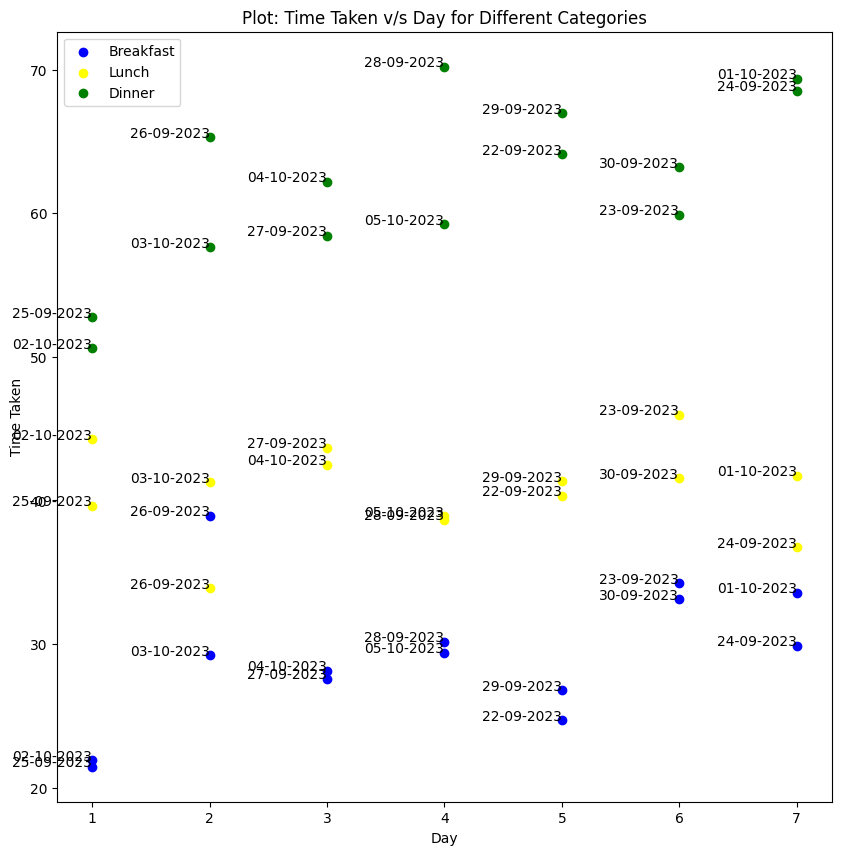

In [6]:
colors = {1: 'blue', 2: 'yellow', 3: 'green'}
categories = {1: 'Breakfast', 2: 'Lunch', 3: 'Dinner'}
plt.figure(figsize=(10, 10))

# Looping through each category and plot the data
for category, color in colors.items():
    category_data = test_data[test_data['Category'] == category]
    plt.scatter(
        category_data['Day'],
        category_data['Time Taken'],
        color=color,
        label=categories[category]
    )

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Time Taken')
plt.title('Plot: Time Taken v/s Day for Different Categories')

# Adding labels for each point
for _, row in test_data.iterrows():
    plt.text(row['Day'], row['Time Taken'], row['Date'], fontsize=10, ha='right')

# Adding legend
plt.legend()

# Showing the plot
plt.grid(False)
plt.show()

**Plotting Time Taken based on what time I entered the mess.**

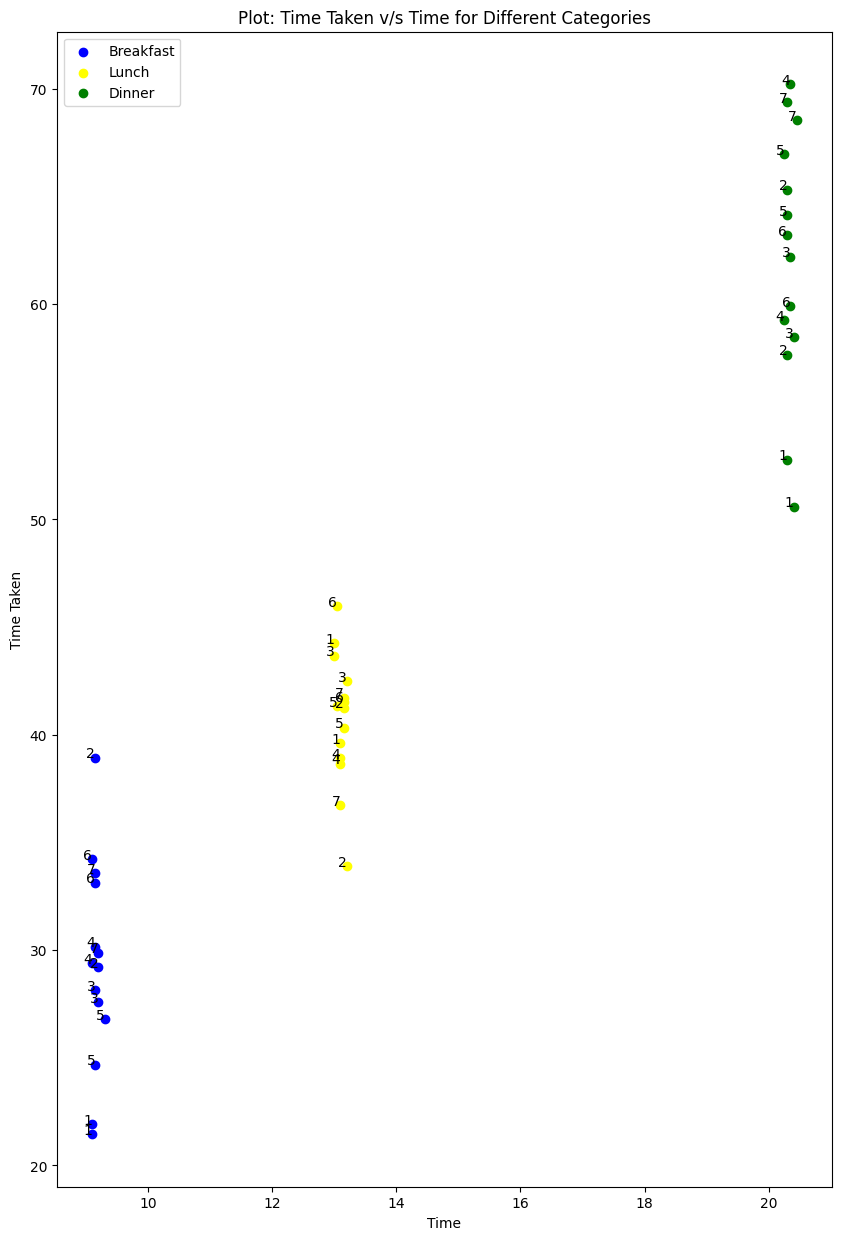

In [10]:
colors = {1: 'blue', 2: 'yellow', 3: 'green'}
categories = {1: 'Breakfast', 2: 'Lunch', 3: 'Dinner'}
plt.figure(figsize=(10, 15))

# Looping through each category and plot the data
for category, color in colors.items():
    category_data = test_data[test_data['Category'] == category]
    plt.scatter(
        category_data['Time'],
        category_data['Time Taken'],
        color=color,
        label=categories[category]
    )

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Time Taken')
plt.title('Plot: Time Taken v/s Time for Different Categories')

# Adding labels for each point
for _, row in test_data.iterrows():
    plt.text(row['Time'], row['Time Taken'], row['Day'], fontsize=10, ha='right')

# Adding legend
plt.legend()

# Showing the plot
plt.grid(False)
plt.show()

**This is to plot the percentage of meal times with respect to the parameter "Day".**

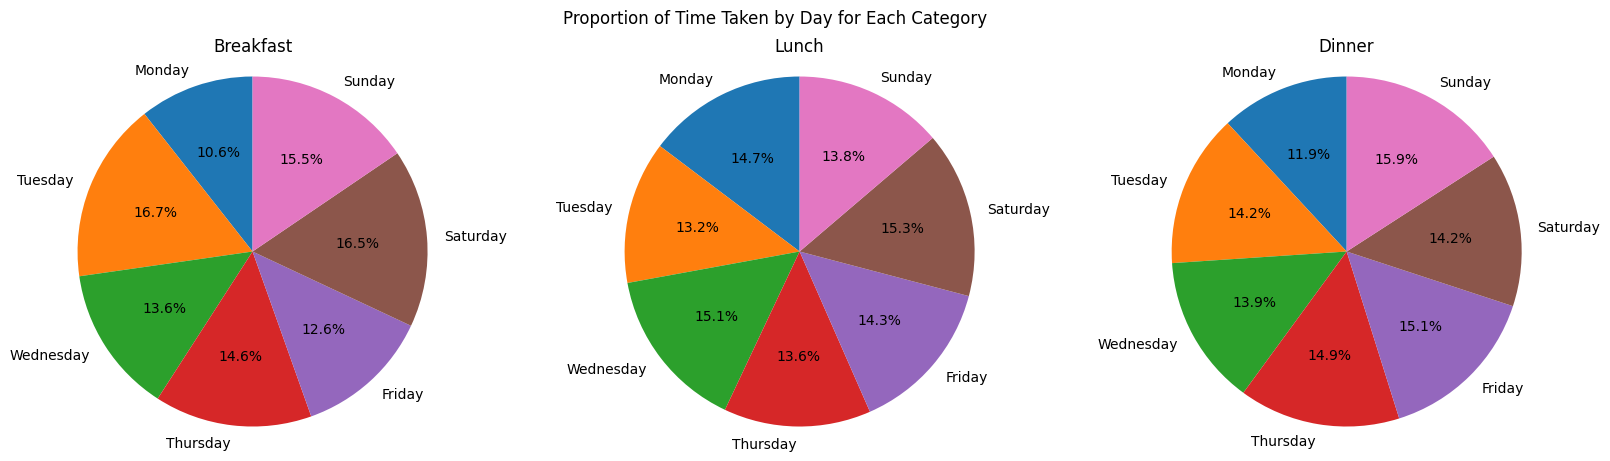

In [10]:
category_totals = test_data.groupby(['Category', 'Day'])['Time Taken'].sum().reset_index()

# Creating a figure with three subplots (one for each category)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Looping through each category and creating a pie chart
for category in [1, 2, 3]:
    category_data = category_totals[category_totals['Category'] == category]
    total_time = category_data['Time Taken'].sum()
    #print(category_data['Day'])
    day = [days[i - 1] for i in category_data['Day']]
    time_taken = category_data['Time Taken']

    axs[category - 1].pie(time_taken, labels= day, autopct='%1.1f%%', startangle=90)
    axs[category - 1].set_title(categories[category])

# Setting the aspect ratio of each pie chart to be equal
for ax in axs:
    ax.axis('equal')

# Adding a common title
fig.suptitle('Proportion of Time Taken by Day for Each Category')

# Showing the plot
plt.show()

# **Exploratory Data Analysis:**
**Observations:**

* The data covers a period of two weeks, with variations in meal times based on the day of the week, whether it's a holiday, and the meal category.
* Breakfast and dinner times vary more than lunch times.
* Sundays have longer dinner times compared to other days.
* Saturdays have longer dinner times than other days, but shorter than Sunday dinners.
* Saturdays and Sundays take up around 30% of the meal time.
* Mondays usually take the least or near least time to finish food, regardless of vategory.
* Holidays have longer meal times compared to other weekdays.
* Tuesday, Wednesday, and Sunday breakfasts take longer than the other day breakfasts.
* Meal times increase from breakfast to dinner.

**Statistics:**

***Category Wise:***

* Breakfast Mean Time: 29.218 minutes
* Lunch Mean Time: 40.74 minutes
* Dinner Mean Time: 62.05 minutes

***Day Wise:***

* Monday Mean Time: 38.435 minutes
* Tuesday Mean Time: 44.377 minutes
* Wednesday Mean Time: 43.757 minutes
* Thursday Mean Time: 44.428 minutes
* Friday Mean Time: 44.033 minutes
* Saturday Mean Time: 46.33 minutes
* Sunday Mean Time: 46.638 minutes

***Holiday Wise:***

* Mean Time if holiday: 46.52 minutes
* Mean Time if not a holiday: 44.228


**Hypothesis:**
* The model best suited for the above data would be Poisson Regression.
* The time taken for meals is typically non-negative (measured in minutes). Poisson Regression is well-suited for modeling count data, which includes non-negative values like meal times.
* Linear regression, on the other hand, assumes a continuous, normally distributed dependent variable, which may not accurately represent your data. Linear regression doesn't take care of the non-linearity in likelihoods.


# Partitioning of Data



In [11]:
train_fract = 0.8

In [12]:
# Partitioning the data into the training and testing set
train = test_data[:int(train_fract*42)]
test = test_data[int(train_fract*42):]

# Linear Regression Approximation

In [18]:
X_lin = []
y_lin = []
lin_train_loss = 0
for i in range (int(train_fract*42)):
  d = train['Day'][i]
  t = train['Time'][i]
  h = train['Holiday'][i]
  c = train['Category'][i]
  y = train['Time Taken'][i]
  X_lin.append([d, t, h, c])
  y_lin.append(y)

#We fit the data using the standard LinearRegression library
reg = LinearRegression().fit(np.array(X_lin), np.array(y_lin))

#We now test the training data and see how well the linear regression model fits it. The error we use here is the Root Mean Squared Error.
for i in range (int(train_fract*42)):
  d = train['Day'][i]
  t = train['Time'][i]
  h = train['Holiday'][i]
  c = train['Category'][i]
  y = train['Time Taken'][i]
  train_pred = reg.predict(np.array([[d, t, h, c]]))[0]
  lin_train_loss += (y - train_pred)**2

lin_train_loss = math.sqrt((lin_train_loss)/int(train_fract*42))


In [26]:
# Here, we test the linear regression model on our partitioned test data
lin_test_loss = 0
predicted_linear = []
print("LINEAR REGRESSION APPROXIMATION:\n")
for i in range (int(train_fract*42), 42):
  d = test['Day'][i]
  t = test['Time'][i]
  h = test['Holiday'][i]
  c = test['Category'][i]
  y = test['Time Taken'][i]

  predicted = reg.predict(np.array([[d, t, h, c]]))[0]
  predicted_linear.append(predicted)
  lin_test_loss += (y - predicted)**2
  print(f"Predicted time taken: {round(predicted, 2)} ---> Actual time taken: {y}")

lin_test_loss = math.sqrt((lin_test_loss)/(42 - int(train_fract*42)))
coef = reg.coef_
print(f"\nPredicted Linear Function: Time Taken = ({round(coef[0], 3)}*day) + ({round(coef[1], 3)}*time) + ({round(coef[2], 3)}*holiday) + ({round(coef[3], 3)}*category) + ({round(reg.intercept_, 3)})")

print("\nLinear Regression Training Loss (RMSE) =", lin_train_loss)
print("Linear Regression Testing Loss (RMSE) =", lin_test_loss)

LINEAR REGRESSION APPROXIMATION:

Predicted time taken: 26.66 ---> Actual time taken: 29.21
Predicted time taken: 38.37 ---> Actual time taken: 41.25
Predicted time taken: 59.81 ---> Actual time taken: 57.65
Predicted time taken: 27.6 ---> Actual time taken: 28.15
Predicted time taken: 39.62 ---> Actual time taken: 42.5
Predicted time taken: 61.05 ---> Actual time taken: 62.2
Predicted time taken: 28.55 ---> Actual time taken: 29.4
Predicted time taken: 40.41 ---> Actual time taken: 38.91
Predicted time taken: 61.85 ---> Actual time taken: 59.25

Predicted Linear Function: Time Taken = (1.096*day) + (3.038*time) + (0.666*holiday) + (-0.286*category) + (-3.194)

Linear Regression Training Loss (RMSE) = 4.570383169643585
Linear Regression Testing Loss (RMSE) = 2.083289651003889


# Poisson Regression Approximation

* In Poisson Regression, we know the likelihood function is given by **L(b) = π<sub>i=1</sub><sup>N</sup>  ((e<sup>-λ<sub>i</sub></sup>λ<sub>i</sub><sup>y<sub>i</sub></sup>)/ y<sub>i</sub>!)**
* **λ<sub>i</sub> = b<sup>T</sup>x<sub>i</sub>**
* Hence, the log likelihood l(b) is given by **Σ<sub>i=1</sub><sup>N</sup>  (-λ<sub>i</sub> + y<sub>i</sub>ln(λ<sub>i</sub>) - ln(y<sub>i</sub>!))**
* Our goal is to maximize the log likelihood. To do so, I have implemented the gradient descent algorithm. The gradient **∇l(b) = Σ<sub>i=1</sub><sup>N</sup>  (x<sub>i</sub> - (y<sub>i</sub>/(b<sup>T</sup>x<sub>i</sub>))x<sub>i</sub>)**.
* We get the gradient descent equation, **b<sub>j+1</sub> = b<sub>j</sub> - ∇l(b)*η**. (η is called the Learning Rate - typically in the range of 0.01 to 0.05)



In [25]:
#b = [b_const, b_day, b_time, b_holiday, b_category]

b = np.array([1, 1, 1, 1, 1])
grad_norm = float('inf')
learningRate = 0.01
while grad_norm > 0.1:
  grad = np.array([0, 0, 0, 0, 0])
  for i in range (int(train_fract*42)):
    x_i = np.array([1] + [train[j][i] for j in ["Day", "Time", "Holiday", "Category"]])
    mult_factor = (train["Time Taken"][i]/np.matmul(np.transpose(x_i), b)) - 1
    grad = np.add(grad, mult_factor*x_i) #Computing the gradient

  b = np.add(b, learningRate*grad)
  grad_norm = np.linalg.norm(grad)

In [27]:
test_poisson_loss = 0
train_poisson_loss = 0
predicted_poisson = []
y_lin_test = []
for i in range (int(train_fract*42)):
  d = train['Day'][i]
  t = train['Time'][i]
  h = train['Holiday'][i]
  c = train['Category'][i]
  y = train['Time Taken'][i]
  #X_lin.append([1, d, t, h, c])
  #y_lin.append(y)
  predicted = np.dot([1, d, t, h, c], b)
  # print(f"Predicted time taken: {round(predicted, 2)} ---> Actual time taken: {y}")
  train_poisson_loss += (y - round(predicted, 2))**2
train_poisson_loss = math.sqrt(train_poisson_loss/(int(train_fract*42)))

for i in range (int(train_fract*42), 42):
  d = test['Day'][i]
  t = test['Time'][i]
  h = test['Holiday'][i]
  c = test['Category'][i]
  y = test['Time Taken'][i]
  #X_lin_test.append([1, d, t, h, c])
  y_lin_test.append(y)
  predicted = np.dot([1, d, t, h, c], b)
  predicted_poisson.append(predicted)
  print(f"Predicted time taken: {round(predicted, 2)} ---> Actual time taken: {y}")
  test_poisson_loss += (y - round(predicted, 2))**2
test_poisson_loss = math.sqrt(test_poisson_loss/(42 - int(train_fract*42)))
print(f"\nPredicted Function using Poisson Regression: Time Taken = ({round(b[0], 3)}*day) + ({round(b[1], 3)}*time) + ({round(b[2], 3)}*holiday) + ({round(b[3], 3)}*category) + ({round(b[4], 3)})")
print("\n\nTotal Training Loss using Poisson Regression =", train_poisson_loss)
print("Total Testing Loss using Poisson Regression =", test_poisson_loss)

Predicted time taken: 27.41 ---> Actual time taken: 29.21
Predicted time taken: 39.32 ---> Actual time taken: 41.25
Predicted time taken: 59.55 ---> Actual time taken: 57.65
Predicted time taken: 28.16 ---> Actual time taken: 28.15
Predicted time taken: 40.33 ---> Actual time taken: 42.5
Predicted time taken: 60.57 ---> Actual time taken: 62.2
Predicted time taken: 28.92 ---> Actual time taken: 29.4
Predicted time taken: 40.96 ---> Actual time taken: 38.91
Predicted time taken: 61.2 ---> Actual time taken: 59.25

Predicted Function using Poisson Regression: Time Taken = (0.058*day) + (0.888*time) + (2.603*holiday) + (0.61*category) + (1.627)


Total Training Loss using Poisson Regression = 4.623780756572318
Total Testing Loss using Poisson Regression = 1.705422723745251


# **Observations:**
* The training loss of Linear Regression is lesser than that of Poisson Regression, but the **Poisson Regression model does better in terms of estimating new data** (Lesser loss in the testing data)
* The Linear Regression model gave **heavy importance (higher coefficient) to the time, and lesser importance to whether it was a holiday or not**. On the other hand, the **Poisson Regression model gave more importance to a niche factor, the holiday factor**.
* The **linear regression model varied with a negative gradient on increase in category**. Meaning, the model estimated lesser time for dinner when compared to breakfast.
* However, due to the "Time" parameter having a direct correlation with the category, the Linear Regression model **made up for the above point by giving heavy positive importance to the time.**
* Poisson Regression, on the other hand, worked intutively and as a human would expect/ estimate. It **increased meal time, both, as the time increased, and as the category increased**. This shows that the Poisson Regression model has learned better in terms of estimation of new data.
* The order of importance of parameters in the

(a) **Linear Regression Model**: Time > Day > Holiday > Category

(b) **Poisson Regression Model**: Holiday > Time > Category > Day

# Final Comparison on Testing Data Plot

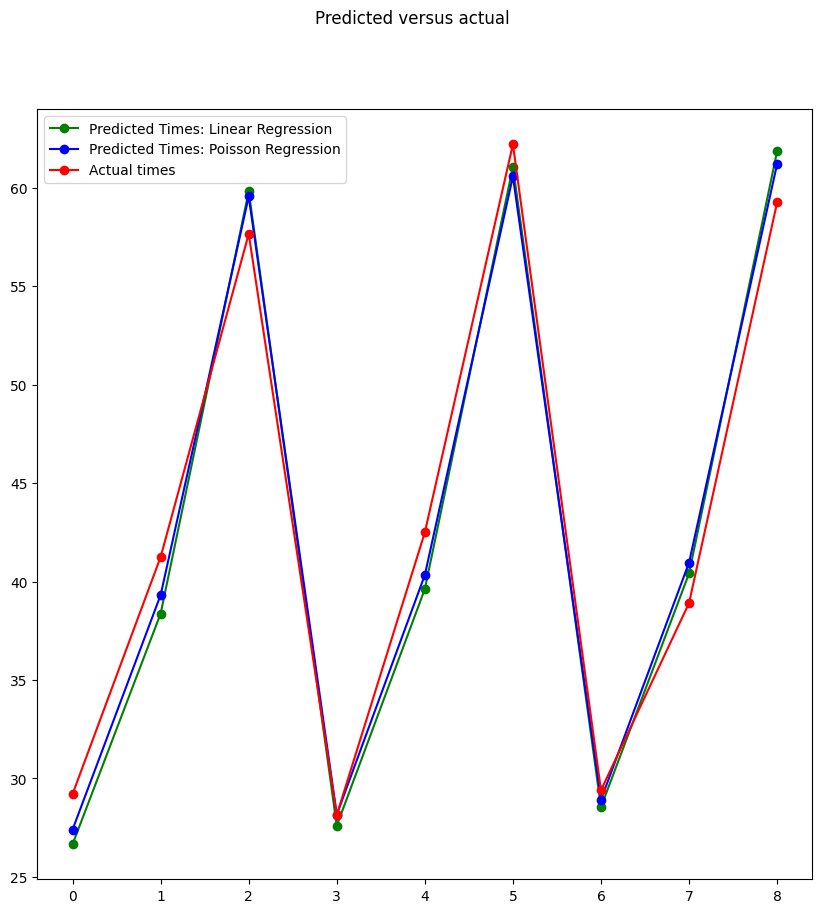

In [30]:
#Plot the predicted counts versus the actual counts for the test data.
fig = plt.figure(figsize = (10, 10))
fig.suptitle('Predicted versus actual')
indices = [i for i in range (42 - int(train_fract*42))]
plot_linear, = plt.plot(indices, predicted_linear, 'go-', label='Predicted Times: Linear Regression')
plot_poisson, = plt.plot(indices, predicted_poisson, 'bo-', label='Predicted Times: Poisson Regression')
actual, = plt.plot(indices, y_lin_test, 'ro-', label='Actual times')
plt.legend(["Predicted Times: Linear Regression", 'Predicted Times: Poisson Regression', 'Actual times'])
plt.show()